#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


#### 3. First look at its main features (head, shape, info).

In [3]:
display(data.shape)
display (data.head())
data.dtypes

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols

In [5]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 5. Change effective to date column to datetime format.

In [6]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

#### 6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions. 

In [7]:
numerical_df = data.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


#### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
def differentiate_variables(numerical_customer_df):
    continuous_vars = []
    discrete_vars = []
    for col in numerical_customer_df.columns:
        num_unique = numerical_customer_df[col].nunique()
        if num_unique > len(data)*0.02:
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)
    return continuous_vars, discrete_vars

In [9]:
continuous_vars, discrete_vars = differentiate_variables(numerical_df)
print('This are continuous variables', continuous_vars), print('This are discrete variables', discrete_vars)

This are continuous variables ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
This are discrete variables ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


(None, None)

In [10]:
# Call the function on the DataFrame
continuous_numerical_df_cols, discrete_numerical_df_cols = differentiate_variables(numerical_df)
continuous_numerical_df = numerical_df[continuous_numerical_df_cols]
discrete_numerical_df = numerical_df[discrete_numerical_df_cols]

In [11]:
continuous_numerical_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [12]:
discrete_numerical_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


#### 8.Plot a correlation matrix, comment what you see.

<function matplotlib.pyplot.show(close=None, block=None)>

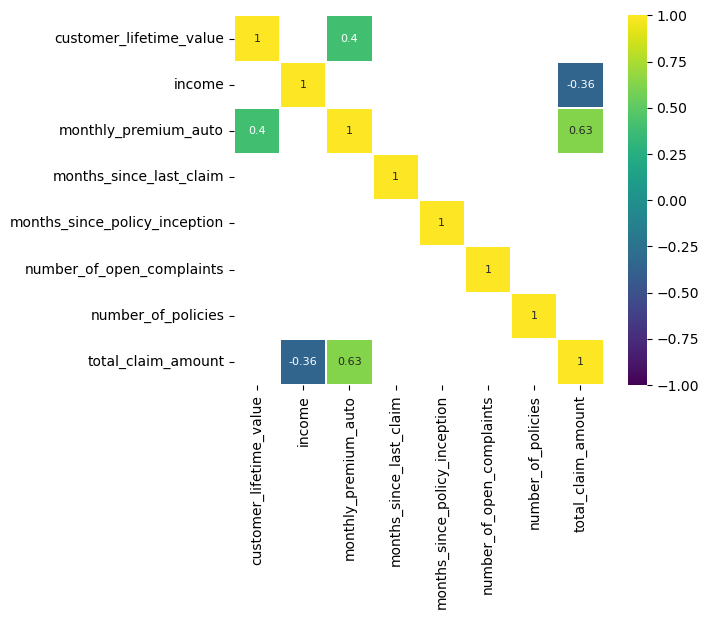

In [13]:
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths = 0.3,
           annot=True, annot_kws={"size":8}, square=True)

plt.show

There is some correlation between total claim amount and montly premium auto. However, it is not relevant as we do not reach very high numbers (higher than 0.85 or -0.85).

#### 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

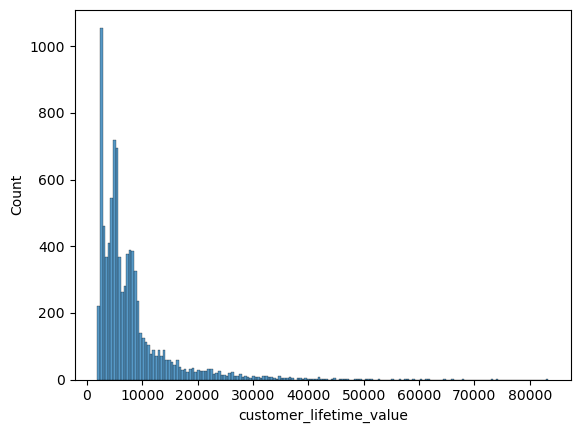

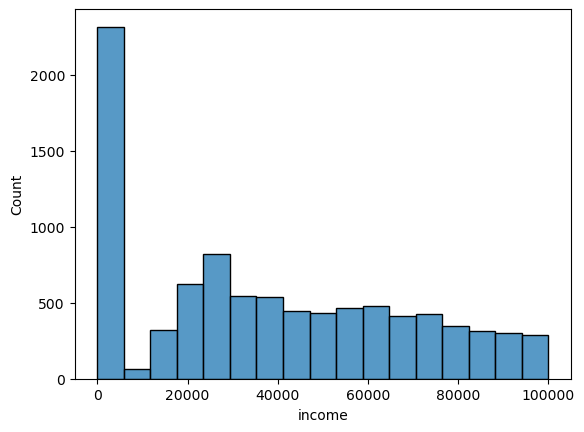

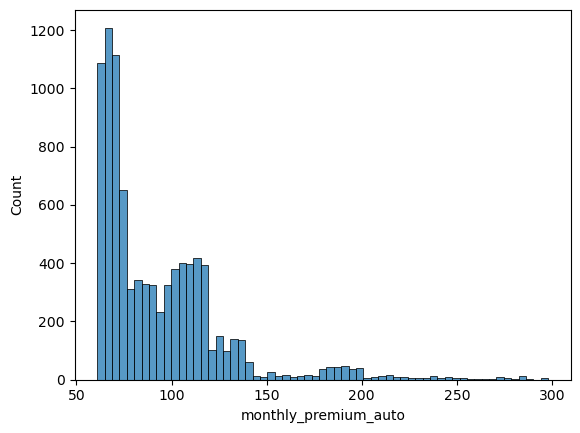

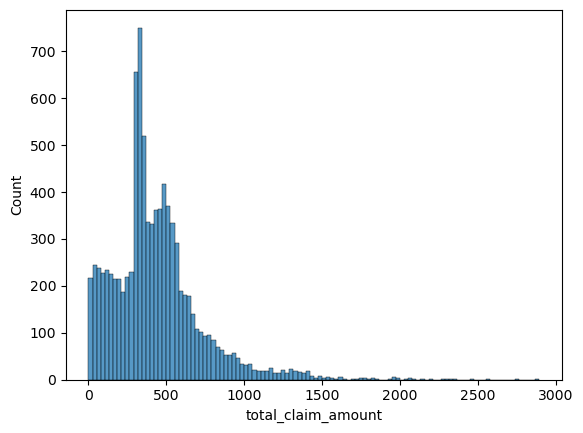

In [14]:
for col in continuous_numerical_df.columns:
    sns.histplot(continuous_numerical_df[col])
    plt.show()

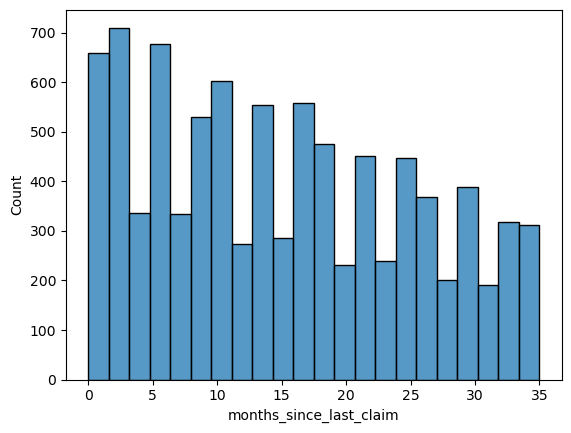

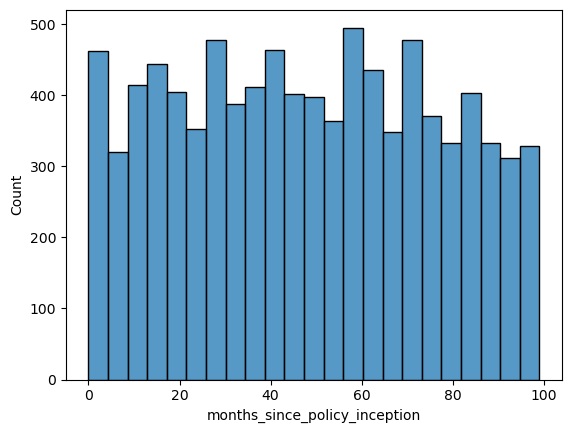

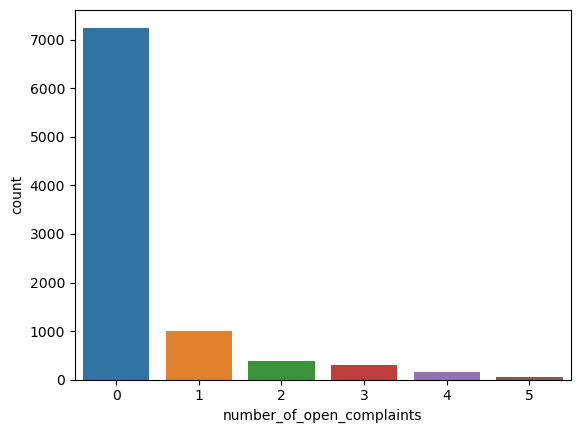

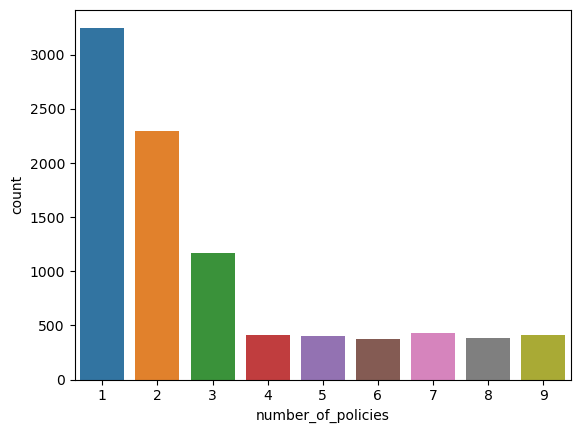

In [15]:
 for col in discrete_numerical_df.columns:
        if discrete_numerical_df[col].nunique() > 10:
            sns.histplot(discrete_numerical_df[col])
            plt.show()
        else:
            sns.countplot(x=col, data=discrete_numerical_df)
            plt.show()

#### 10. Comment what you can see in the plots.

I don´t find normal distribution in any of them. On discrete columns with less than 10 unique values I find typical that low values repeat them more times that big one´s.

#### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

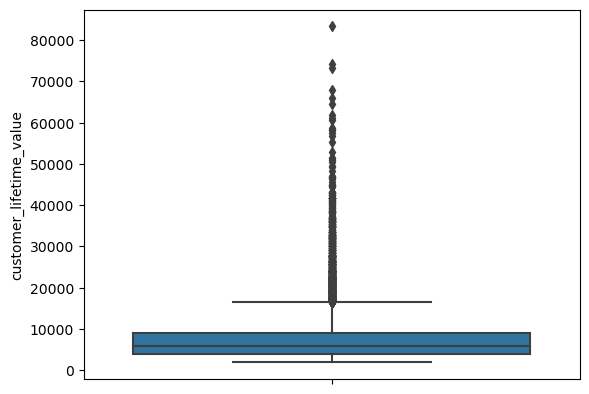

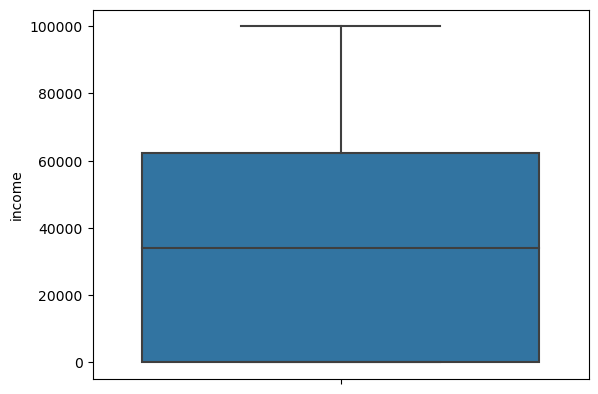

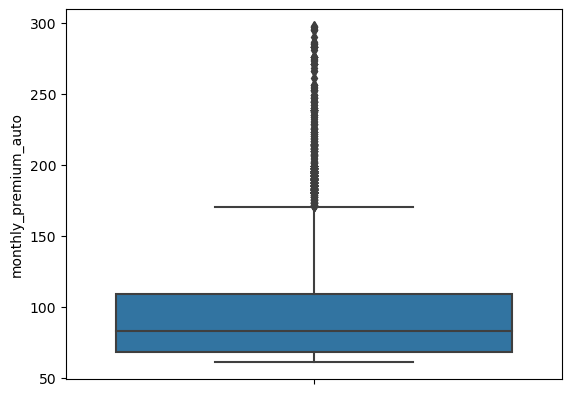

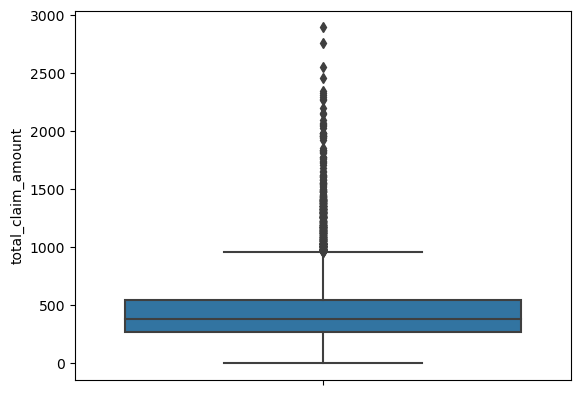

In [16]:
for column in continuous_numerical_df.columns:
    sns.boxplot(y= continuous_numerical_df[column])
    plt.show()


We find outliers in 'total_claim_amount' and customer_timelife_values but not in income. I decided to drop them and I will create a function for that. 

#### 12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

In [17]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [18]:
detect_outlier (continuous_numerical_df['monthly_premium_auto'])

[237,
 172,
 186,
 192,
 217,
 255,
 190,
 245,
 225,
 171,
 244,
 183,
 176,
 183,
 230,
 177,
 196,
 276,
 253,
 180,
 203,
 192,
 198,
 193,
 271,
 188,
 271,
 206,
 196,
 193,
 182,
 189,
 295,
 210,
 182,
 239,
 188,
 256,
 188,
 173,
 196,
 192,
 285,
 197,
 199,
 214,
 171,
 198,
 271,
 214,
 175,
 199,
 194,
 181,
 180,
 239,
 222,
 215,
 283,
 248,
 223,
 239,
 273,
 213,
 185,
 188,
 287,
 180,
 196,
 192,
 297,
 244,
 201,
 192,
 189,
 196,
 235,
 196,
 183,
 268,
 171,
 182,
 211,
 192,
 187,
 235,
 276,
 185,
 198,
 242,
 193,
 186,
 210,
 210,
 175,
 199,
 180,
 197,
 223,
 215,
 276,
 276,
 180,
 186,
 172,
 215,
 212,
 199,
 249,
 181,
 187,
 240,
 196,
 189,
 181,
 181,
 225,
 199,
 192,
 201,
 245,
 193,
 295,
 191,
 187,
 199,
 186,
 181,
 239,
 199,
 195,
 180,
 216,
 173,
 182,
 199,
 196,
 194,
 185,
 249,
 185,
 191,
 199,
 181,
 193,
 211,
 214,
 187,
 179,
 232,
 244,
 193,
 181,
 181,
 182,
 214,
 183,
 185,
 185,
 187,
 198,
 211,
 190,
 186,
 181,
 212,
 181

In [19]:
detect_outlier (continuous_numerical_df['total_claim_amount'])

[1131.464935,
 982.399613,
 975.107098,
 1087.995426,
 1122.658899,
 1836.0,
 1124.427734,
 1284.093173,
 2345.413441,
 1101.6,
 1159.2,
 1252.406235,
 1003.160633,
 1317.6,
 1090.86434,
 1337.063487,
 980.169081,
 1324.8,
 1171.93117,
 1214.4,
 1002.782553,
 1210.920949,
 2027.724442,
 1382.4,
 1577.674417,
 1193.036154,
 1300.8,
 1265.570302,
 1022.4,
 1300.8,
 1254.137899,
 972.0,
 1310.4,
 1360.8,
 1416.0,
 1008.0,
 2893.239678,
 1185.988301,
 1228.8,
 1353.6,
 1027.000029,
 1027.177255,
 1336.931716,
 1067.333126,
 1418.4,
 1027.2,
 1300.8,
 1149.203884,
 1027.2,
 1261.943541,
 964.8,
 1294.700423,
 1253.984948,
 1027.000029,
 1032.0,
 973.787176,
 1358.4,
 1207.084251,
 1605.6,
 989.105367,
 1294.700423,
 972.0,
 1965.6,
 1448.994134,
 1186.972445,
 979.2,
 1178.995926,
 1353.6,
 1377.6,
 1777.471271,
 1382.4,
 1767.348807,
 1171.2,
 964.8,
 1227.458548,
 1072.8,
 1051.2,
 2201.327879,
 1012.249308,
 1052.933035,
 1272.546918,
 1128.0,
 1286.4,
 1129.929433,
 1171.537594,
 1012.8

As there are many outliers I decide not to remove them in 'monthly_premium_auto'. In the case of 'total_claim_amount' it is the same, besides being the 'Target_d' so I will not remove anything.

In [20]:
# I was trying to learn to drop outliers, but i didn´t find the way.
        # IQR
# Q1 = np.percentile(continuous_numerical_df['monthly_premium_auto'], 25)
# Q3 = np.percentile(continuous_numerical_df['monthly_premium_auto'], 75)
# IQR = Q3 - Q1
# print("Old Shape: ", continuous_numerical_df.shape)
# # Upper bound
# upper_limit=Q3+1.5*IQR
# upper_limit2 = continuous_numerical_df['monthly_premium_auto'] > upper_limit
# upper_limit2
# # # Lower bound
# lower_limit=Q1-1.5*IQR
# lower_limit
# # Removing the outliers
# continuous_numerical_df['monthly_premium_auto'].drop(upper_limit2,inplace=True)
# continuous_numerical_df['monthly_premium_auto'].drop(lower_limit,inplace=True)
# print("New Shape: ", continuous_numerical_df.shape)

# # continuous_numerical_df['monthly_premium_auto']= numerical_df[(continuous_numerical_df['monthly_premium_auto']>lower_limit) & (continuous_numerical_df['monthly_premium_auto']<upper_limit)].copy()
# # sns.displot(continuous_numerical_df['monthly_premium_auto'])
# # plt.show()

#### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [21]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

#### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [22]:
numerical_df.to_csv('numerical.csv', index=False)

# Lab 2 - Cleaning categorical data

#### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [23]:
categorical_df = data.select_dtypes(include = [object, np.datetime64])

#### 3. Check for NaN values and decide what to do with them, do it now.

In [24]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

#### 4. Check all unique values of columns.

In [25]:
display(categorical_df.nunique())

customer             9134
state                   5
response                2
coverage                3
education               5
effective_to_date      59
employmentstatus        5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

#### 5. Check dtypes. Do they all make sense as categorical data?

In [26]:
categorical_df.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

Yes, they make sense as categorical data.

#### 6., 7. and 9. Does any column contain alpha and numeric data? Decide how to clean it and do it now. 
#### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
#### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [27]:
categorical_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


There are 2 with alpha.numeric data: customer y effective_to_date. I´m going to drop customer and i will build new colum with effective_to_date to split them only in 2 unique values (January and February)

In [28]:
categorical_df = categorical_df.drop('customer', axis=1)

In [29]:
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

categorical_df['effective_to_date'].head()

0    2011-02
1    2011-01
2    2011-02
3    2011-01
4    2011-02
Name: effective_to_date, dtype: object

#### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [30]:
display(data['policy_type'].value_counts(dropna=False))
display(data['policy'].value_counts(dropna=False))

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [31]:
policies=categorical_df.pivot_table(index= ['policy_type','policy'], aggfunc = {'policy_type':'count'})
policies

policy_type
policy_type    policy                   
Corporate Auto Corporate L1          359
               Corporate L2          595
               Corporate L3         1014
Personal Auto  Personal L1          1240
               Personal L2          2122
               Personal L3          3426
Special Auto   Special L1             66
               Special L2            164
               Special L3            148

The important thing about these columns is that they are divided into 3 columns: Corporate Auto, Personal Auto and Special Auto.In this case I don't see the need to divide it into 3 other categories (L1,L2,L3) so I would delete the 'policy' column.

#### 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [32]:
categorical_df.to_csv('categorical.csv', index=False)